In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv("/content/drive/MyDrive/MIT FutureMakers/Day 16/voice.csv")
df = pd.DataFrame(data)

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [12]:
la=LabelEncoder()
df['label']=la.fit_transform(df['label'])

df.info()
df['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [13]:
corr=df.corr()
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


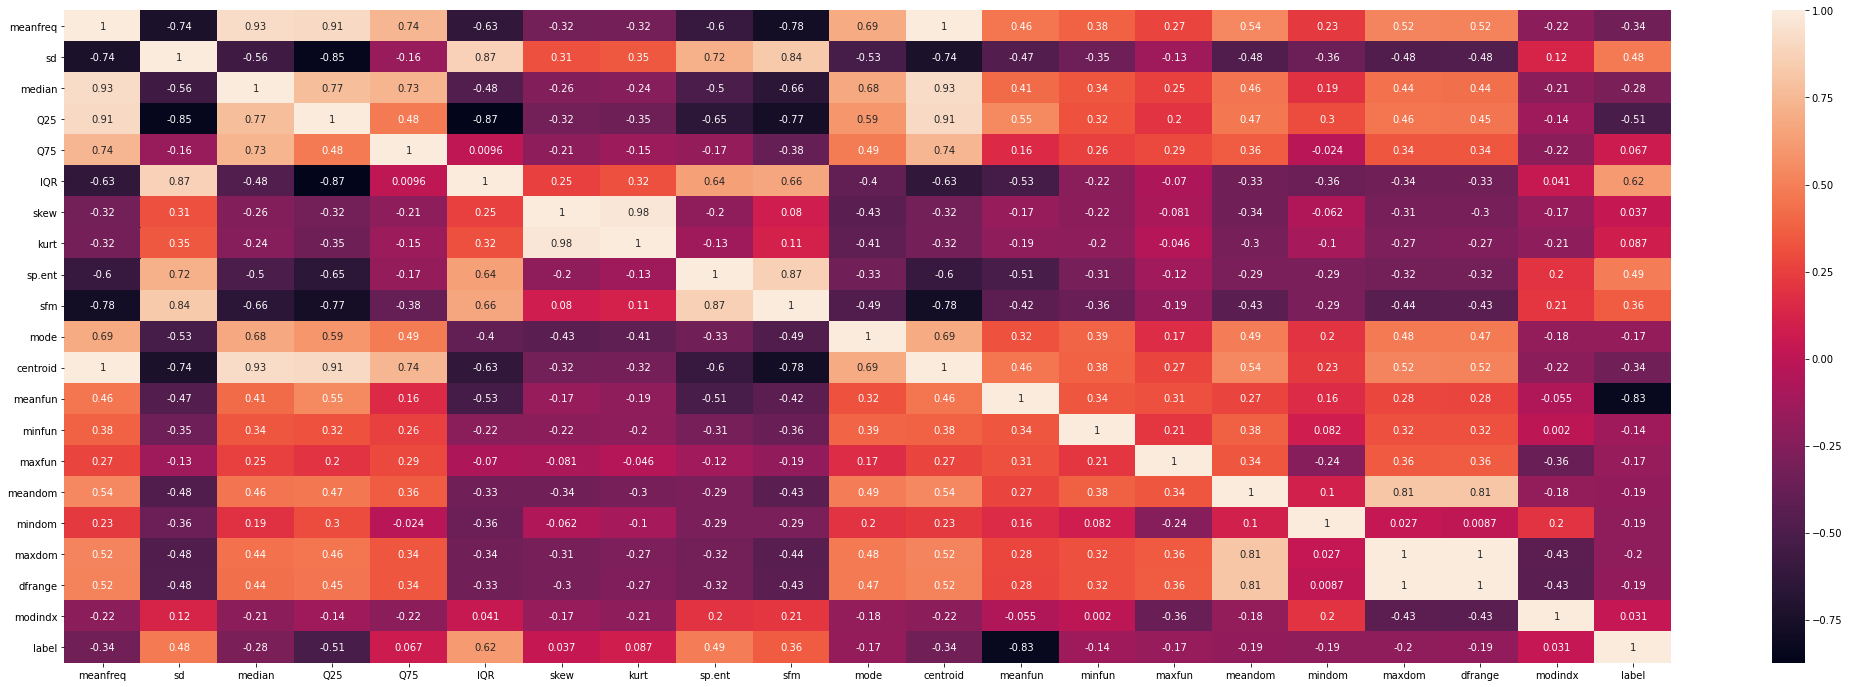

In [14]:
plt.subplots(figsize=(36,12))
sns.heatmap(corr, annot=True)

In [15]:
corr['label'].sort_values(ascending=False)

label       1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64

In [16]:
x=df.drop(['meanfun','Q25','meanfreq','centroid','median','maxdom','mindom','dfrange','meandom','mode','maxfun','minfun','label'], axis=1)
x.describe()

,sd,Q75,IQR,skew,kurt,sp.ent,sfm,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.057126,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.173752
std,0.016652,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.119454
min,0.018363,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000
25%,0.041954,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.099766
50%,0.059155,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.139357
75%,0.067020,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.209183
max,0.115273,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.932374


In [17]:
scaler = StandardScaler()
x = pd.DataFrame(data=scaler.fit_transform(x), columns=x.columns)
x

,sd,Q75,IQR,skew,kurt,sp.ent,sfm,modindx
0,0.427355,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-1.454772
1,0.611669,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-1.014103
2,1.603848,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-1.065344
3,0.899998,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,0.614286
4,1.322561,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,0.289046
...,...,...,...,...,...,...,...,...
3163,1.658182,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,-0.098989
3164,1.927682,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,0.871981
3165,2.322724,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,0.175887
3166,2.012196,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,1.149161


In [18]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [20]:
cla=SVC()
cla.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
cla.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
param = {
    'C': [1,2],
    'kernel': ['rbf', 'sigmoid'],
    'degree' : [3,4],
    'break_ties' : [True, False],
    'verbose' : [True, False],
    'probability' : [True, False]
}
grid = GridSearchCV(estimator=cla, param_grid=param, cv= 5)
grid.fit(xtrain, ytrain)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2], 'break_ties': [True, False],
                         'degree': [3, 4], 'kernel': ['rbf', 'sigmoid'],
                         'probability': [True, False],
                         'verbose': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
grid.best_params_

{'C': 2,
 'break_ties': True,
 'degree': 3,
 'kernel': 'rbf',
 'probability': True,
 'verbose': True}

In [24]:
cla2=SVC(C=2 , random_state=0, kernel= 'rbf', degree=3 , break_ties= True, verbose=True , probability=True )
cla2.fit(xtrain, ytrain)

[LibSVM]

SVC(C=2, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=True)

In [25]:
ytest_predict= cla2.predict(xtest)
accuracy_score(ytest_predict, ytest)

0.9457070707070707

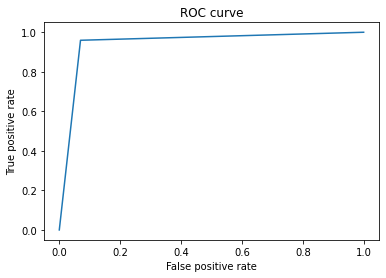

AUC of the predictions: 0.9448610569017257
Accuracy score of the predictions: 0.9457070707070707


In [26]:
fpr, tpr, thresholds =roc_curve(ytest, ytest_predict, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

print("AUC of the predictions: {0}".format(auc(fpr, tpr)))

print("Accuracy score of the predictions: {0}".format(accuracy_score(ytest_predict, ytest)))

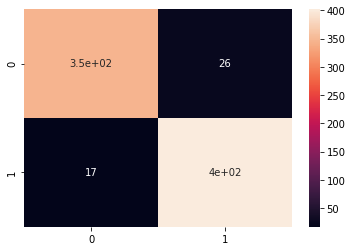

In [27]:
confu = confusion_matrix(ytest, ytest_predict, labels = [0,1])
sns.heatmap(confu, annot=True)

In [28]:
print("Classification Report for our model is ")
print(classification_report(ytest, ytest_predict))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       373
           1       0.94      0.96      0.95       419

    accuracy                           0.95       792
   macro avg       0.95      0.94      0.95       792
weighted avg       0.95      0.95      0.95       792

